In [1]:
import math
from datetime import timedelta
from operator import attrgetter

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib.animation import FuncAnimation

from parcels import (
    AdvectionRK4,
    FieldSet,
    JITParticle,
    ParticleSet,
    Variable
)


def get_particle_file(data_source):
    variables = {
        "U": "uo",
        "V": "vo",
    }
    dimensions = {"lat": "latitude", "lon": "longitude", "time": "time"}
    fieldset = FieldSet.from_netcdf("data/glorys_data_30d.nc", variables, dimensions)

    lon_mesh, lat_mesh = np.meshgrid(data_source[dimensions['lon']].data[0], data_source[dimensions['lat']].data[0])
    lats=lat_mesh.flatten()

    lons=lon_mesh.flatten()

    pset = ParticleSet.from_list(fieldset=fieldset,   # the fields on which the particles are advected
                                pclass=JITParticle,  # the type of particles (JITParticle or ScipyParticle)
                                lon=lons, # a vector of release longitudes 
                                lat=lats) 
    
    output_file = pset.ParticleFile(
        name="tst.zarr", outputdt=timedelta(hours=1)
    )
    pset.execute(
        AdvectionRK4,
        runtime=timedelta(days=20),
        dt=timedelta(minutes=5),
        output_file=output_file,
    )

In [2]:
data_source = xr.open_dataset("data/glorys_data_30d.nc")

In [3]:
get_particle_file(data_source)

RuntimeError: OSError during compilation. Please check if compiler exists: /home/phaslee/anaconda3/bin/x86_64-conda-linux-gnu-cc

In [19]:
ds = xr.open_zarr("outputs/tst.zarr")
plats=ds.lat.values
plons=ds.lon.values
plons.shape

(400, 480)

In [20]:
x=plats.reshape(20,20, 480)
y=plons.reshape(20,20, 480)

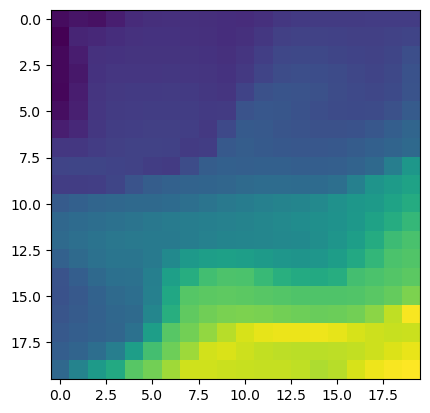

In [23]:
plt.imshow(x[:,:,400])